<h1 align="center">ANÁLISIS DE ALGORITMOS</h1>

<h2 align="center">Sesiones 02 y 03: Algoritmia elemental</h2>

<h2 align="center">ESCUELA DE CIENCIAS</h2>

<h2 align="center">DOCTORADO EN INGENIERÍA MATEMÁTICA</h2>

<h2 align="center">UNIVERSIDAD EAFIT</h2>

<h3 align="center">MEDELLÍN - COLOMBIA </h3>

<h3 align="center">2019 </h3>

### Docente: Carlos Alberto Álvarez Henao, I.C. Ph.D.

2. Algoritmia elemental (Sesiones 02 y 03)

    2.1 Eficiencia de los algoritmos
    
    2.2 Análisis de “caso medio” y “caso peor”
    
    2.3 Operaciones elementales
    
    2.4 Buscando la eficiencia
    
    2.4 Ejemplos y desafíos

**_Nota:_** Conceptos retomados en parte de (Brassard y Bratley, 1998).

# 2. Algoritmia Elemental



Entenderemos por *algoritmia* el estudio de los algoritmos.


- En ciertas situaciones podremos necesitar un algoritmo que consuma el menor tiempo posible o el que use menos espacio, o el de mayor facilidad en programación. En estos casos es importante poder disponer de elementos para tomar la decisión adecuada.


- La algoritmia nos dará las herramientas para evaluar los efectos de esos factores, posibilitando la selección del que más se ajuste a las necesidades particulares.

### Ejemplo de un algoritmo:

Multiplicación $\grave{a}$ $la$ $russe$

En *lenguaje natural*, la definición del algoritmo sería:

"Se escriben el multiplicando y el multiplicador uno junto a otro. Se hacen dos columnas, una debajo de cada operando, repitiendo la regla siguiente hasta que el número de la columna izquierda sea un 1: *se divide el número de la columna de la izquierda por 2, ignorando los restos y se duplica el número de la columna de la derecha sumándolo consigo mismo. A continuación se tachan todas las filas en las cuales el número de la columna izquierda sea par, y finalmente se suman los número que quedan en la columna de la derecha*."

|**Numero 1**|**Numero 2**|**Resultado**|
|:----:|:-----:|:-----:|
| 981  |  1.234|  1.234|
| 490  |  2.468|       |
| 245  |  4.936|  4.936|
| 122  |  9.872|       |
|  61  | 19.744| 19.744|
|  30  | 39.488|       |
|  15  | 78.976| 78.976|
|   7  |157.952|157.952|
|   3  |315.904|315.904|
|   1  |631.808|631.808|
|   -  |   -   | -     |
|   -  |   -   |1.210.554|

### Pseudocódigo

### Diagrama de flujo

![Imagen](https://github.com/carlosalvarezh/Analisis_de_Algoritmos/blob/master/images/DiagFlujoAlgoritmo.png?raw=true "")

### Código en lenguaje de programación (python)

In [ ]:
# Código en lenguaje de programación (Python)

def rusa(m,n):
    print(m, "\t", n)
    resultado = 0
    while m != 1:
        if m%2 != 0:
            resultado += n
            print("\t\t",resultado)
        m = int(m/2)
        n += n
        print(m, "\t", n)
    resultado += n
    print("\t\t",n)
    return resultado

m = int(input("ingrese un número: "))
n = int(input("Ingrese otro número: "))

print("m \t n\t resultado")
print("la multiplicación de {0} x {1} es {2}".format(m,n,rusa(m,n)))

Un algoritmo debe funcionar correctamente para todos los casos del problema en cuestión. 

- El algoritmo de multiplicación $\grave{a}$ $la$ $russe$, solo se puede emplear para números enteros positivos.


- Un algoritmo es incorrecto si no cumple al menos para un caso.


- Como en el ejemplo anterior, el algoritmo es correcto una vez se especifica su dominio de validéz (enteros mayores que cero)

## 2.1 Eficiencia de los algoritmos

- Para resolver un problema dado se puede contar no con una única forma sino varias, muchas, e incluso infinitas formas de afrontar el problema, o ninguna.


- De existir una posible respuesta, se desea seleccionar el mejor algoritmo que permita encontrar su solución.


- Entonces resulta la pregunta **_¿cómo decidir entre varios algoritmos cuál es el mejor?_**

- Si el problema a resolver es pequeño o son pocos los casos, el criterio de selección del algoritmo adecuado puede definirse por el que sea más fácil de programar, o alguno para el cual ya se cuente con algún programa.


- Si se tienen que resolver muchos casos, o si el problema es muy difícil y consume muchos recursos de máquina (memoria RAM, capacidad de almacenamiento, procesador, tiempo, energía, etc...) es necesario realizar algún tipo de análiss previo para determinar cuál es el algoritmo que mejor se adecúe a nuestras necesidades.

- **Enfoque empírico (a posteriori):** para la selección de un algoritmo, consiste en programar las diferentes técnicas e irlas probando para distintos casos en una computadora.


- **Enfoque teórico (a priori):** es el que se estudiará a lo largo del curso, y consiste en determinar matemáticamente la cantidad de recursos necesarios a ser empleados en cada uno de los algoritmos propuestos en función del tamaño de los problemas. 


- Los recursos de mayor interés son el tiempo de cómputo y el espacio de almacenamiento.

En el curso, hablar de la *eficiencia del algoritmo* se referirá a qué tan rápido obtiene la respuesta.

- También nos podrémos interesar por otros tipos de recursos como el almacenamiento, cantidad de procesadores en algoritmos en paralelo, entre otros.


- Por *tamaño* definiremos cualquier entero que mida de alguna forma el número de componentes de un problema.

- La ventaja de la aproximación teórica es que no depende ni de la computadora, ni del lenguaje de programación, ni siquiera de las habilidades del programador.


- Permite estudiar la eficiencia del algoritmo cuando es usado en problemas de cualquier tamaño.


- Se puede emplear una aproximación híbrida.

- Si lo que se desea es medir la cantidad de espacio empleado por el algoritmo en función del tamaño del problema, está bien definida la unidad *bit*, ya que es el mismo valor independientemente del tipo de máquina empleado para la ejecución del algoritmo.


- Si la unidad de medida de eficiencia del algoritmo es el tiempo, no existe tanta claridad al respecto en el sentido de que no existe una computadora estándar sobre la cual tomar la medida.

**_Principio de invarianza:_** Para intentar dar respuesta a la situación anterior, se tiene este principio que afirma que *dos implementaciones distintas de un mismo algoritmo no diferirán en su eficiencia en más de alguna constante multiplicativa*.

Más formalmente, si dos implementaciones del mismo algoritmo necesitan $t_1(n)$ y $t_2(n)$ segundos, respectivamente, para resolver un caso de tamaño $n$, entonces existe una constante real $c>0$ y un número natural $n_0$ tal que para todo $n \geq n_0$ se tiene que $t_1(n) \leq ct_2(n)$, con $n$ suficientemente grande.

- El tiempo de ejecución de cualquiera de las implementaciones está acotado por un múltiplo constante del tiempo de ejecución de la otra.

- Este principio es cierto sea cual fuere la computadora utilizada, independientemente del lenguaje de programación y del compilador empleado, e incluso de la habilidad del programador, siempre y cuando no se modifique el algoritmo.

  - Un cambio de máquina puede resolver un problema $10$ o $100$ veces más rápido, proporcionando un cambio describible por un factor constante.

  - Un cambio de algoritmo puede dar un incremento que se vuelva cada vez más pronunciado a medida que crezca el tamaño de $n$.

Con el principio de invarianza la unidad de medida de la eficiencia desaparece. Se dirá entonces que:

> *un algoritmo requiere un tiempo **del orden de** $t(n)$ para una función dada $t$, si existe una constante positiva $c$ y una implementación del algoritmo capaz de resolver todos los casos de tamaño $n$ en un tiempo que no sea superior a $ct(n)$ unidades de tiempo (segundos, milisengundos, minutos, años, $\ldots$.)*

Hay ciertos tipos de **_orden de_** que merecen especial atención:

Suponga que el tiempo necesario para que un algoritmo resuelva un caso del tamaño $n$ nunca es más que $cn$ segundos, se dirá entonces que el algoritmo requiere un tiempo en el orden de $n$, o que se requiere de un tiempo *lineal*.

- si un algoritmo nunca necesita más de $cn^2$ segundos para resolver un caso de tamaño $n$, entonces se dirá que requiere de un tiempo del orden de $n^2$, o que se requiere de un tiempo *cuadrático*.


- De la misma forma se tienen algorítmos de orden *cúbico, polinomial, logarítmico, exponencial*, entre muchos otros.

## 2.2 Análisis de *caso medio* y *caso peor*

El tiempo que consume un algoritmo, o el espacio de almacenamiento, pueden variar considerablemente entre dos ejemplares distintos del mismo tamaño.

- **_Caso mejor:_** corresponde a la secuencia de sentencias del algoritmo que realiza menos instrucciones.


- **_Caso peor:_** Análogo al anterior, corresponde al algoritmo que realiza más instrucciones.


- **_Caso medio:_** Secuencia de sentencias que realiza un número de instrucciones igual a la esperanza matemática de la variable aleatoria definida por todas las posibles sentencias del algoritmo para un tamaño dado.


**_p.ej._** Considérense dos algoritmos elemenentales de ordenación: por *inserción* y por _selección_.

- El ciclo principal de la ordenación por inserción va recorriendo sucesivamente todos los elementos de la matriz desde el segundo hasta el $n-ésimo$, e inserta cada uno en el lugar adecuado entre los predecesores del arreglo, $T$.

Codificando el algoritmos de insersión en un lenguaje de programación (*Python* en este caso)

In [ ]:
def insersion(T,n):
    for i in range(1,n):
        x = T[i]
        j = i
        while j > 0 and x < T[j-1]:
            T[j] = T[j-1]
            j -= 1
        T[j] = x
    return T
        

El algoritmo de ordenamiento por *selección* es

- La ordenación por selección funciona seleccionando el menor elemento del arreglo y llevándolo al principio; a continuación selecciona el siguiente menor y lo pone en la segunda posición del arreglo, y así sucesivamente.

Codificando el algoritmo de *selección* en un lenguaje de programación (*Python* en este caso);

In [ ]:
def seleccion(T,n):
    for i in range(0,n-1):
        minimo = i
        for j in range(i+1, n):
            if T[j]< T[minimo]:
                minimo = j
        aux = T[i]
        T[i] = T[minimo]
        T[minimo] = aux
    return T

Ahora realicemos un pequeño experimento numérico:

Sean $U$ y $V$ dos arreglos con $n$ elementos tales que $U$ ya está ordenado en forma ascendente, mientras que $V$ está ordenado en orden descendente, empleando el algoritmo de *insersión* y cambiando el tamaño $n$ del arreglo a ordenar

In [ ]:
import numpy as np # Carga bibliotecas numéricas
from time import time # Carga biblioteca de tiempo

n = 10 #Tamaño del arreglo
U = [i for i in range(n)] #Generación del arreglo en orden ascendente, utilizando list comprehension
print("U: {0}".format(U)) #Impresión del arreglo U
V = [i for i in range(n-1,-1,-1)] #Generación del arreglo en orden descendente
print("V: {0}".format(V)) #Impresión del arreglo V

# Cálculo del tiempo de ejecución para el algoritmo de Insersión en el arreglo U
tinU = time()
Uins = insersion(U,n)
toutU = time()
print("Arreglo U ordenado mediante el algoritmo de insersión: {0}".format(Uins))

elapsedU = toutU - tinU
print("Tiempo ordenamiento U por algoritmo insersion: {0}".format(elapsedU))

# Cálculo del tiempo de ejecución para el algoritmo de Insersión en el arreglo V
tinV = time()
Vins = insersion(V,n)
toutV = time()
print("Arreglo V ordenado mediante el algoritmo de insersión: {0}".format(Vins))

elapsedV = toutV - tinV
print("Tiempo ordenamiento V por algoritmo insersion: {0}".format(elapsedV))

Tpercent = abs(elapsedU - elapsedV)/elapsedU*100
print("porcentaje de tiempo para ambos arreglos por algoritmo insersion: {0:4.2f}".format(Tpercent))


Repitiendo el experimento numérico anterior, pero esta vez empleando el algoritmod de *selección*

- **_Nota:_** Obsérvese que se generarán nuevamente los arreglos. Tenga cuidado de usar los $U$ y $V$ anteriores, ya que éstos fueron modificados (verificar!!!)

In [ ]:
n = 10 #Tamaño del arreglo
U = [i for i in range(n)] #Generación del arreglo en orden ascendente, utilizando list comprehension
print("U: {0}".format(U)) #Visualización del arreglo U (solo habilitarlo para n pequeño)
V = [i for i in range(n-1,-1,-1)] #Generación del arreglo en orden descendente
print("V: {0}".format(V)) #Visualización del arreglo V (solo habilitarlo para n pequeño)

# Cálculo del tiempo de ejecución para el algoritmo de seleccion en el arreglo U
tinU = time()
Usel = seleccion(U,n)
toutU = time()
print("Arreglo U ordenado mediante el algoritmo de seleccion: {0}".format(Usel))

elapsedU = toutU - tinU
print("Tiempo ordenamiento U por algoritmo seleccion: {0}".format(elapsedU))

# Cálculo del tiempo de ejecución para el algoritmo de seleccion en el arreglo V
tinV = time()
Vsel = seleccion(V,n)
toutV = time()
print("Arreglo V ordenado mediante el algoritmo de seleccion: {0}".format(Vsel))

elapsedV = toutV - tinV
print("Tiempo ordenamiento V por algoritmo seleccion: {0}".format(elapsedV))

Tpercent = abs(elapsedU - elapsedV)/elapsedU*100
print("porcentaje de tiempo para ambos arreglos por algoritmo seleccion: {0:4.2f}".format(Tpercent))


Realizando un análisis básico de estos dos algoritmos presentados tenemos:

- En ambos algoritmos, ordenar en forma ascendente (de menor a mayor) el arreglo $V$ (que está "desordenado" de mayor a menor) consume mucho más tiempo que el arreglo $U$ (que ya está ordenado de menor a mayor).


- Ordenar el arreglo $V$ es el peor caso posible de ordenación.


- El tiempo requerido por el algoritmo de *selección* no es muy sensible al orden original del vector, ya que la comprobación $T[j] < T[minimo]$ en todos los casos.


- La variación en el tiempo se deberá entonces al número de veces que se ejecutan las instrucciones en el bloque seguido del *entonces* en dicho condicional.

Se puede comprobar cuál sería la variación máxima en el tiempo cuando se tiene el arreglo desordenado de forma diferente.

Veamos estos otros ejemplo, ahora generando la misma cantidad de elementos en cada experimento pero desordenados aleatoriamente. Se determinará cuál sería la variación de tiempo en cada caso.

- Se usarán las funcionalidades del *Python* para generar números aleatorios.

In [ ]:
import random as rnd
import matplotlib.pyplot as plt

n = 500
#a = np.arange(n)
#np.random.shuffle(a)
#print(a[:10])

elapsed = []

for i in range(n):
# Cálculo del tiempo de ejecución para el algoritmo de seleccion en el arreglo U
    a = np.arange(n)
    np.random.shuffle(a)
    
    tina = time()
    asel = seleccion(a,n)
    touta = time()
    
    elapsedT = (touta - tina) #/touta * 100
    elapsed.append(elapsedT)
    #print("Tiempo ordenamiento por algoritmo seleccion: {0}".format(elapseda))
#print(elapsed)
#Tpercent = abs(elapsedU - elapsedV)/elapsedU*100
#print("porcentaje de tiempo para ambos arreglos por algoritmo seleccion: {0:4.2f}".format(Tpercent))

x = np.arange(n)
plt.scatter(x,elapsed)
plt.ylim(0.0025,0.005)
plt.show()

Se observa que la variación en los tiempos para cada tamaño de $n$ no es muy significativa cuando se tienen diferentes disposiciones desordenadas de los elementos del arreglo empleando el algoritmo de *selección*.

La situación se muy diferente cuando se emplea el algoritmo de *inserción*. Veamos el mismo ejemplo.

In [ ]:
import random as rnd
import matplotlib.pyplot as plt

n = 500
#a = np.arange(n)
#np.random.shuffle(a)
#print(a[:10])

elapsed = []

for i in range(n):
# Cálculo del tiempo de ejecución para el algoritmo de seleccion en el arreglo U
    a = np.arange(n)
    np.random.shuffle(a)
    
    tina = time()
    asel = insersion(a,n)
    touta = time()
    
    elapsedT = (touta - tina) #/touta * 100
    elapsed.append(elapsedT)
    #print("Tiempo ordenamiento por algoritmo seleccion: {0}".format(elapseda))
#print(elapsed)
#Tpercent = abs(elapsedU - elapsedV)/elapsedU*100
#print("porcentaje de tiempo para ambos arreglos por algoritmo seleccion: {0:4.2f}".format(Tpercent))

x = np.arange(n)
plt.scatter(x,elapsed)
plt.ylim(0.015,0.025)
plt.show()

Con el algoritmo de *insersión* se observa (visualmete) una mayor dispersión en los datos.

Más adelante se tratarán estos temas de una forma más rigurosa.

## 2.3 Operaciones elementales

Una *operación elemental* es aquella cuyo tiempo de ejecución se puede acotar superiormete por una constante que solamente dependerá de la implementación particular usada de la máquina, del lenguaje de programación, etc.

- La constante no dependerá ni del tamaño ni de los parámetros del problema considerado.


- Interesa únicamente la cantidad de operaciones ejecutadas y no el tiempo exacto que tardará cada una de ellas.


- Supongamos que al analizar cierto algoritmo se requerira realizar $n$ adiciones, $m$ multiplicaciones, y $s$ instrucciones de asignación.


- Supongamos también que se sabe que una suma nunca requiere más de $t_n$ microsegundos, una multiplicación nunca requiere más de $t_m$ microsegundos, y una asignación nunca requiere más de $t_s$ microsegundos.

  - Estas tres operaciones pueden considerarse *elementales*.

El tiempo total $t$ requerido por el algoritmo estará acotado por:

$$t \leq at_a + mt_m + st_s \leq max(t_a,t_m,t_s) \times (a+m+s)$$

- El tiempo exacto requerido por cada operación elemental no es importante, por lo que se considerarán como unitarias.

Al describir un algoritmo, una única línea del código puede corresponder a un número variable de operaciones elementales.

- Sea $T$ un arreglo de $n$ elementos $(n>0)$, entonces el tiempo requerido para calcular

$$x \leftarrow min\{T[i] | 1 \leq i \leq n \}$$

crece con $n$, puesto que esto es la abreviación de

Otras operaciones matemáticas son muy complejas y no pueden considerarse como *elementales*.

Veamos como breve ejemplo el *Teorema de Wilson* que establece que un entero $n (\forall n>1)$ divide exactamente a la cantidad $(n-1)! + 1$, sii $n$ es un número primo.

para este algoritmo, es necesario calcular el factorial de un número (más adelante volveremos sobre este algoritmo para realizar un análisis más detallado). Por ahora solo presentaremos el código en *python* de una solución al algoritmo del factorial de un número:

In [ ]:
def factorial(n):
    resultado = 1
    for i in range(2,n+1):
        resultado *= i
    return resultado

In [ ]:
def wilson(n):
    if (factorial(n-1) + 1) % n == 0:
        print("{0} es un número primo".format(n))
    else:
        print("{0} no es un número primo".format(n))

In [ ]:
n = int(input("ingrese un número entero: "))

wilson(n)

Como se observa, la operación *elemental* requiere el cálculo del factorial de un número, que no es una operación trivial, y se hace más compleja a medida que $n$ crece.

### Reglas generales para el cálculo del número de operaciones elementales (OE)

A continuación se determinarán algunas reglas básicas a tener en cuenta para realizar el cálculo del número de operaciones elementales. Se considerará siempre el peor caso.


Tomemos como ejemplo el siguiente algoritmo de búsqueda de un elemento dentro de un arreglo:

Para determinar el tiempo de ejecución del algoritmo, se calculará primero el número de operaciones elementales (OE) línea por línea

- Línea $(2)$ se ejecuta una asignación: 1 OE

- Línea $(3)$ se ejecuta el ciclo *Mientras* con $4$ OE (dos comparaciones, un acceso al arreglo y un "AND")

- Línea $(4)$ tiene un contador y una asignación, en total $2$ OE

- Línea $(6)$ contiene la evaluación de una condición *Si* y el acceso al arreglo, en total $2$ OE.

- Línea $(7)$ si la condición se cumple se evalúa el Return, $1$ OE

- Línea $(9)$ si la condición no se cumple, se evalúa el siguiente Return, $1$ OE


La cantidad de OE en la copia del vector dependerá del lenguaje de programación a usar. Si el lenguaje usado emplea paso por referencia (python, por ejemplo) no se contabilizarán OE, pero si el paso es por valor, se deberá contabilizar $n$ OE. Con esto, 

**_Caso mejor:_** 

- Línea $(1)$ se ejecuta una única vez. 
- Línea $(3)$ se ejecuta solo la mitad, ya que las expresiones se evalúan de izquierda a derecha y con "cortocircuito", es decir, tan pronto se conozca el valor de la expresión lógica, ésta no seguirá evaluándose sin necesidad de evaluar la totalidad de sus términos.
- Líneas $(6)$ a $(9)$ se ejecutará una evaluación *Si* y una asignación, sea cuando la condición es falsa o verdadera.

- En total se realizarán $T(n)=1+2+3 = 6$ OE

**_Caso peor:_** 

- Se ejecuta la Línea $(1)$, $1$ OE

- El ciclo se repite $n-1$ veces hasta que se cumple la segunda condición.

- Se ejecuta el condicional de la línea $/6)$ y la función acaba en la línea $(9)$.

- Cada iteración del ciclo ejecuta las líneas $(3)$ y $(4)$, junto con una ejecución adicional de la línea $(3)$ que es la que ocasional la salida del ciclo, se tiene

$$T(n) = 1 + \left( \left( \sum \limits_{i=1}^{n-1} (4+2)\right)+4\right) + 2 + 1 = 6n+2$$

**_Caso medio:_** 

- El ciclo se repite una cantidad de veces entre $0$ y $n-1$ y se supone que cada una de ellas tiene la misma probabilidad de suceder. Pueden suceder hasta $n$ veces, dado que el elemento a buscar no se encuentre dentro del arreglo, se supondrá, a priori, que son equiprobables y por tanto cada una tendrá una probabilidad asociada de $1/n$. Con esto, el número medio de veces que se efectuará el ciclo es

$$\sum \limits_{i=0}^{n-1} i \frac{1}{n}=\frac{n-1}{2}$$

- Se tiene entonces

$$T(n) = 1 + \left( \left( \sum \limits_{i=1}^{(n-1)/2} (4+2)\right)+2\right) + 2 + 1 = 3n+3$$

### Reglas generales para el cálculo de OE

- El tiempo de una OE es, por definición, de orden $1$


- La constante $c$, mencionada en el principio de *invarianza* dependerá de la implementación, pero para los fines del curso se considerará que vale $1$.


- El tiempo de ejecución de una secuencia consecutiva de instrucciones se calcula sumando los tiempos de ejecución de cada una de las instrucciones.


- El tiempo de ejecución de una sentencia tipo *"Si A entonces B sino C"* es $T=T(A) + max\{T(B),T(C) \})$


- El tiempo de ejecución de un ciclo de sentencias tipo *"Mientras A hacer B"* es $T = T(A) + (\# iteraciones) \times (T(B)+T(A))$

- El tiempo de ejecución de una llamada a un procedimiento o función $F(P_1,P_2, \ldots, P_n)$ es $1$ por llamada, más el tiempo de evaluación de cada uno de los parámetros, más el tiempo en tardar en ejecutarse la función $F$, esto es, $T = 1 + T(P_1) + T(P_2) + \ldots  + T(P_n)  + T(F)$.
  - No se contabiliza la copia de los argumentos a la pila de ejecución (salvo que se trate de estructuras complejas como registros o vectores) que se pasan por valor.
  - El paso de parámetros por referencia (punteros) no se contabilizan tampoco.

- En ciclos tipo *"Para (`for`)"*

se puede expresar como un ciclo *"Mientras (`while`)"* con un ciclo equivalente de la siguiente forma

## 2.4 Buscando la eficiencia

**_"Adquirir un mejor computador o intentar mejorar el algoritmo... he ahí la cuestión"_**

**[Ley de Moore](https://es.wikipedia.org/wiki/Ley_de_Moore "Ley de Moore"):** _"El poder de cómputo de las máquinas se duplica cada año o cada dos años en promedio, mientras que su costo disminuye considerablemente."_

El desarrollo de un algoritmo tiene varias etapas:

![Imagen](https://github.com/carlosalvarezh/Analisis_de_Algoritmos/blob/master/images/MooresLaw.jpg?raw=true "")

- No sería más simple esperar simplemente a que salga una nueva generación de procesadores más potente que pensar en cómo mejorar un determinado algoritmo?

Veamos este ejemplo:

Supóngase que para resolver un problema se dispone de un algoritmo exponencial y de un computador que puede ejecutar el algoritmo para casos de tamaño $n$ en $10^{-4} \times 2^n$ segundos. El computador puede ejecutar un problema de tamaño $10$ en $10^{-4} \times 2^{10}$ segundos (o $1/10$ de segundo). Resolver un problema de tamaño $20$ requerirá un tiempo mil veces mayor, dos minutos aprox. Resolver un problema de tamaño $30$ requeriría otras mil veces más de tiempo que el problema anterior, eso es más de un día de cómputo. Si se pudiera poner a ejecutar el problema por un año sin interrupción, el tamaño máximo del problema sería de $n=38$.

Ahora supóngase que se adquiere otro computador que puede resolver un problema de orden $n$ en $10^{-6} \times 2^n$ segundos. Poniendo el computador a trabajar todo el año, el tamaño máximo del problema sería de $n=45$.

Con esto, si antes se podía resolver un problema de tamaño $n$ en un determinado tiempo, la nueva máquina podría resolver problemas de tamaño como mucho $n+log(100)$ o aproximadamente $n+7$, en el mismo periodo de tiempo.

Ahora, si se decide invertir en buscar una mejora en el algoritmo, por ejemplo, de orden cúbico y suponiendo que se usa la máquina original y este nuevo algoritmo para resolver un problema de tamaño $n$ en $10^{-2}\times n^3$ segundos. Entonces, para resolver un problema de tamaño $10$ se necesitarían 10 segundos, y un problema de tamaño $20$ entre uno y dos minutos. Un problema de tamaño $30$ se podría resolver en algo más de cuatro minutos, y en un día se podría resolver un problema de tamaño mayor que $200$. En un año, el tamaño sería de $n = 1500$.

Ahora, si se puede dar el lujo de invertir tanto en la mejora del algoritmo como de la máquina podría resolver problemas cuatro o cinco veces mayores en la misma unidad de tiempo.

Será así para cualquier tamaño del problema? qué pasa si se usa el nuevo algoritmo para problemas con tamaño $n<20$?

In [2]:
def tiempo(a, b, c):
    return 10**(-a)*b**c

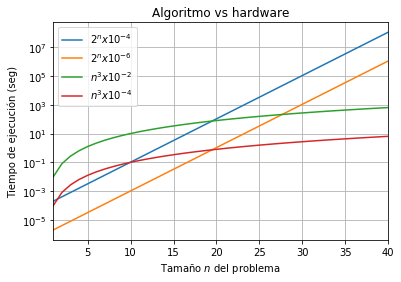

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def grafica(c1,c2,a1,a2,n):
    x = np.arange(1, n)
    #plt.figure(figsize=(10, 8))
    plt.semilogy(x,c1, label = "$2^n x 10^{-4}$")
    plt.semilogy(x,c2, label = "$2^n x 10^{-6}$")
    plt.semilogy(x,a1, label = "$n^3 x 10^{-2}$")
    plt.semilogy(x,a2, label = "$n^3 x 10^{-4}$")
    plt.legend()
    plt.title("Algoritmo vs hardware")
    plt.xlabel("Tamaño $n$ del problema")
    plt.ylabel("Tiempo de ejecución (seg)")  # Colocamos la etiqueta en el eje y
    plt.axhline(y=0, color='k')
    plt.xlim(1, n-1) 
    plt.grid(True)
    plt.show()

c1,c2,a1,a2,n = [],[],[],[],41

for i in range(1,n):
    c1.append(tiempo(4,2,i))
    c2.append(tiempo(6,2,i))
    a1.append(tiempo(2,i,3))
    a2.append(tiempo(4,i,3))   
grafica(c1,c2,a1,a2,n)

## 2.5 Desafío 1:

Revisar los ejemplos propuestos en (Brassard y Bratley, 1998. Sección 2.7 pp. 85 ss.) 


- Cálculo de determinantes


- Ordenación


- Multiplicación de enteros muy grandes


- Cálculo del MCD


- Cálculo de la sucesión de Fibonacci


- Transformada de Fourier


Buscar algunos algoritmos creados para resolver uno de ellos, codificarlos en algún lenguaje y presentar un análisis de complejidad, graficando el comportamiento de los mismos a medida que los tamaños de los problemas crecen. Cuáles son sus conclusiones a la luz de lo visto en la clase?